# Data Preparation

## Packages load

In [1]:
# Load Packages
library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Dataset Load

In [2]:
#Load Dataset
data <- read.csv("data.csv", fileEncoding= "EUC-KR")

In [3]:
head(data)

,날짜,역번호,역명,구분,X03.04시,X04.05시,X05.06시,X06.07시,X07.08시,X08.09시,⋯,X17.18시,X18.19시,X19.20시,X20.21시,X21.22시,X22.23시,X23.00시,X00.01시,X01.02시,X02.03시
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2024-01-01,1101,판암,승차,0,66,61,55,50,87,⋯,120,129,54,47,33,13,13,2,0,0
2,2024-01-01,1101,판암,하차,0,53,50,74,48,51,⋯,145,130,111,85,73,94,62,17,0,0
3,2024-01-01,1102,신흥,승차,0,0,18,106,21,40,⋯,41,37,30,15,16,8,3,0,0,0
4,2024-01-01,1102,신흥,하차,0,0,9,104,17,15,⋯,45,69,39,37,27,39,20,6,0,0
5,2024-01-01,1103,대동,승차,0,27,94,31,51,77,⋯,116,84,102,52,49,37,28,0,0,0
6,2024-01-01,1103,대동,하차,0,25,85,58,70,32,⋯,103,112,85,98,85,106,99,14,0,0


In [4]:
str(data)

'data.frame':	12716 obs. of  28 variables:
 $ 날짜    : chr  "2024-01-01" "2024-01-01" "2024-01-01" "2024-01-01" ...
 $ 역번호  : int  1101 1101 1102 1102 1103 1103 1104 1104 1105 1105 ...
 $ 역명    : chr  "판암" "판암" "신흥" "신흥" ...
 $ 구분    : chr  "승차" "하차" "승차" "하차" ...
 $ X03.04시: int  0 0 0 0 0 0 0 0 0 0 ...
 $ X04.05시: int  66 53 0 0 27 25 5 5 98 97 ...
 $ X05.06시: int  61 50 18 9 94 85 16 54 50 18 ...
 $ X06.07시: int  55 74 106 104 31 58 129 228 35 24 ...
 $ X07.08시: int  50 48 21 17 51 70 103 219 26 57 ...
 $ X08.09시: int  87 51 40 15 77 32 163 273 58 104 ...
 $ X09.10시: int  138 64 48 21 114 44 219 292 59 186 ...
 $ X10.11시: int  119 59 36 15 86 54 339 402 88 174 ...
 $ X11.12시: int  104 82 53 29 99 66 419 496 165 283 ...
 $ X12.13시: int  155 90 49 36 104 55 559 452 177 447 ...
 $ X13.14시: int  160 95 75 25 124 69 534 537 175 518 ...
 $ X14.15시: int  199 108 42 43 120 84 731 523 279 549 ...
 $ X15.16시: int  133 154 47 62 106 111 927 460 380 501 ...
 $ X16.17시: int  150 159 53 58 124 112

In [5]:
colnames(data)

[1] "날짜"     "역번호"   "역명"     "구분"     "X03.04시" "X04.05시"
 [7] "X05.06시" "X06.07시" "X07.08시" "X08.09시" "X09.10시" "X10.11시"
[13] "X11.12시" "X12.13시" "X13.14시" "X14.15시" "X15.16시" "X16.17시"
[19] "X17.18시" "X18.19시" "X19.20시" "X20.21시" "X21.22시" "X22.23시"
[25] "X23.00시" "X00.01시" "X01.02시" "X02.03시"

## Data Cleaning

In [6]:
# Standardize column names
colnames(data) <- gsub("시", "", colnames(data))
colnames(data) <- gsub("\\..*", "", colnames(data))

In [7]:
# Reshape data to long format
data_long <- data %>%
  pivot_longer(cols = starts_with("X"), 
               names_to = "time_period", 
               values_to = "traffic_count")

In [8]:
# Clean data suffix
data_long$time_period <- gsub("X", "", data_long$time_period)
data_long$time_period <- gsub("\\.", "-", data_long$time_period) 

In [9]:
data_long$traffic_count <- as.numeric(data_long$traffic_count)

In [10]:
# Clean Data with NA Values
data_clean <- data_long %>%
  filter(!is.na(traffic_count))

In [12]:
colnames(data_clean)

[1] "날짜"          "역번호"        "역명"          "구분"         
[5] "time_period"   "traffic_count"

In [13]:
str(data_clean)

tibble [305,184 × 6] (S3: tbl_df/tbl/data.frame)
 $ 날짜         : chr [1:305184] "2024-01-01" "2024-01-01" "2024-01-01" "2024-01-01" ...
 $ 역번호       : int [1:305184] 1101 1101 1101 1101 1101 1101 1101 1101 1101 1101 ...
 $ 역명         : chr [1:305184] "판암" "판암" "판암" "판암" ...
 $ 구분         : chr [1:305184] "승차" "승차" "승차" "승차" ...
 $ time_period  : chr [1:305184] "03" "04" "05" "06" ...
 $ traffic_count: num [1:305184] 0 66 61 55 50 87 138 119 104 155 ...


## Handling Missing Values

In [14]:
# Confirm for NA Values
sum(is.na(data_clean))

[1] 0

In [15]:
summary(data_clean)

     날짜               역번호         역명               구분          
 Length:305184      Min.   :1101   Length:305184      Length:305184     
 Class :character   1st Qu.:1106   Class :character   Class :character  
 Mode  :character   Median :1112   Mode  :character   Mode  :character  
                    Mean   :1112                                        
                    3rd Qu.:1117                                        
                    Max.   :1122                                        
 time_period        traffic_count   
 Length:305184      Min.   :   0.0  
 Class :character   1st Qu.:  26.0  
 Mode  :character   Median : 119.0  
                    Mean   : 183.1  
                    3rd Qu.: 252.0  
                    Max.   :3895.0  

# Explarotary Data Analysis

## Traffic Count Over Time

In [16]:
data <- data_clean

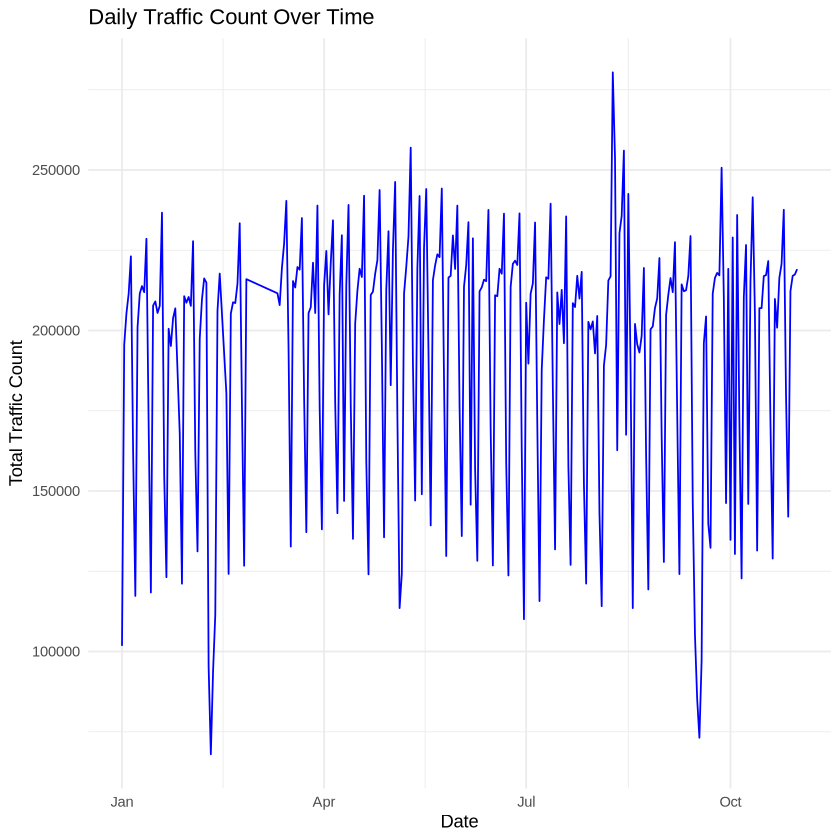

In [17]:
# Making new group by feature
daily_traffic <- data %>%
  group_by(날짜) %>%
  summarise(total_traffic = sum(traffic_count, na.rm = TRUE))

# Convert 날짜 to Date format
daily_traffic$날짜 <- as.Date(daily_traffic$날짜)

# Data Visualization
ggplot(daily_traffic, aes(x = 날짜, y = total_traffic)) +
  geom_line(color = "blue") +
  labs(title = "Daily Traffic Count Over Time",
       x = "Date",
       y = "Total Traffic Count") +
  theme_minimal()

## Traffic Distribution by Time Period

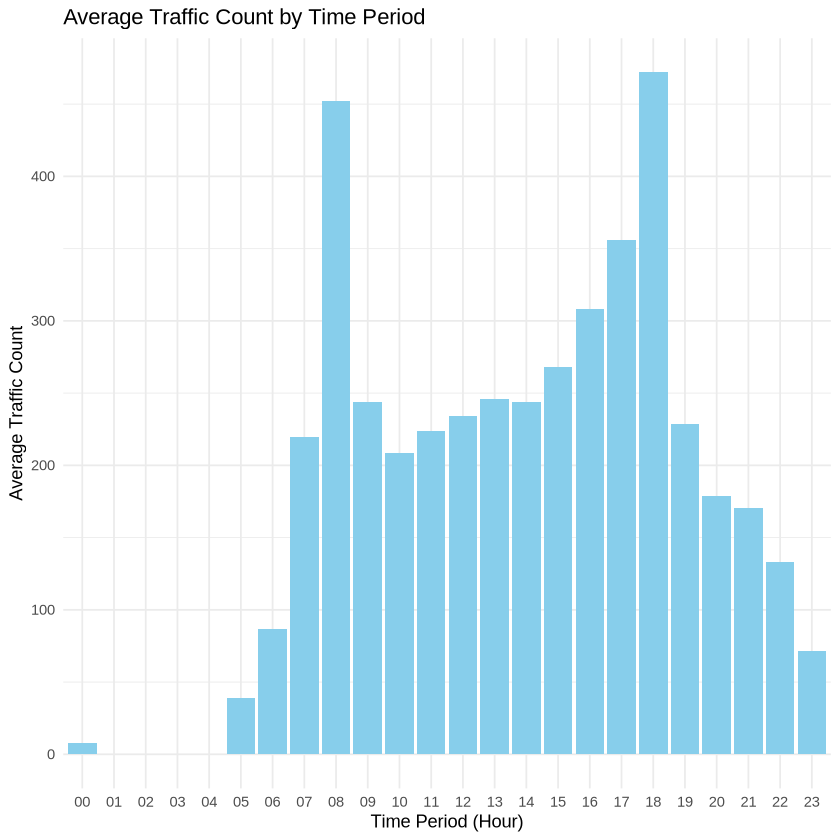

In [18]:
# Group by time_period and average traffic count
time_period_traffic <- data %>%
  group_by(time_period) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))

# Data Visualization
ggplot(time_period_traffic, aes(x = time_period, y = avg_traffic)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Traffic Count by Time Period",
       x = "Time Period (Hour)",
       y = "Average Traffic Count") +
  theme_minimal()

## 승차 vs. 하차 Comparasion

구분,total_traffic
<chr>,<dbl>
승차,27985335
하차,27878543


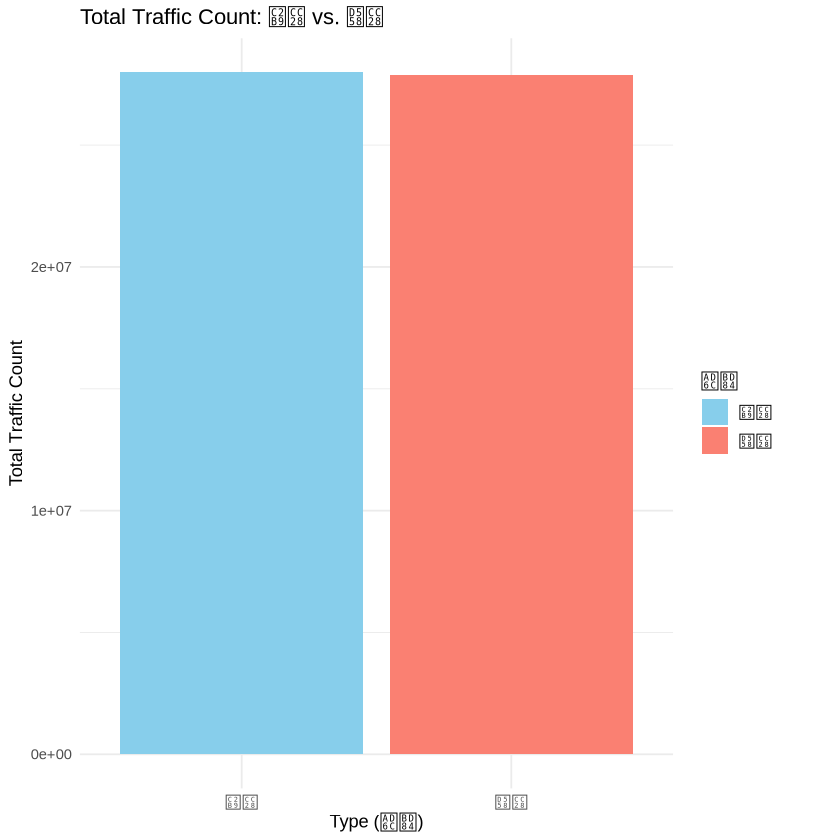

In [19]:
# Group by 구분 and sum the total traffic
boarding_alighting <- data %>%
  group_by(구분) %>%
  summarise(total_traffic = sum(traffic_count, na.rm = TRUE))
boarding_alighting

# Data Visualization
ggplot(boarding_alighting, aes(x = 구분, y = total_traffic, fill = 구분)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Traffic Count: 승차 vs. 하차",
       x = "Type (구분)",
       y = "Total Traffic Count") +
  theme_minimal() +
  scale_fill_manual(values = c("skyblue", "salmon"))


## Top 5 Busiest Stations

역명,avg_traffic
<chr>,<dbl>
대전,457.1512
유성온천,377.4822
시청,297.4901
반석,280.3047
정부청사,262.3850


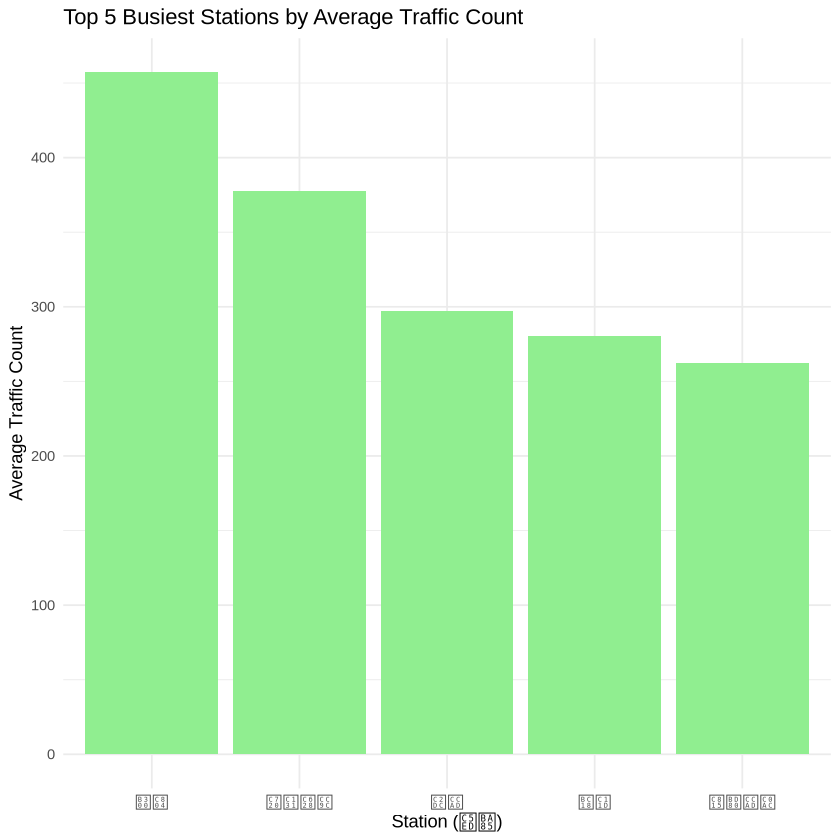

In [20]:
# Group by 역명 and calculate the average traffic_count
busiest_stations <- data %>%
  group_by(역명) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE)) %>%
  arrange(desc(avg_traffic)) %>%
  slice(1:5)  # Select top 5
busiest_stations

# Plot the top 5 busiest stations
ggplot(busiest_stations, aes(x = reorder(역명, -avg_traffic), y = avg_traffic)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Top 5 Busiest Stations by Average Traffic Count",
       x = "Station (역명)",
       y = "Average Traffic Count") +
  theme_minimal()

## Average Traffic Count by Day of the Week

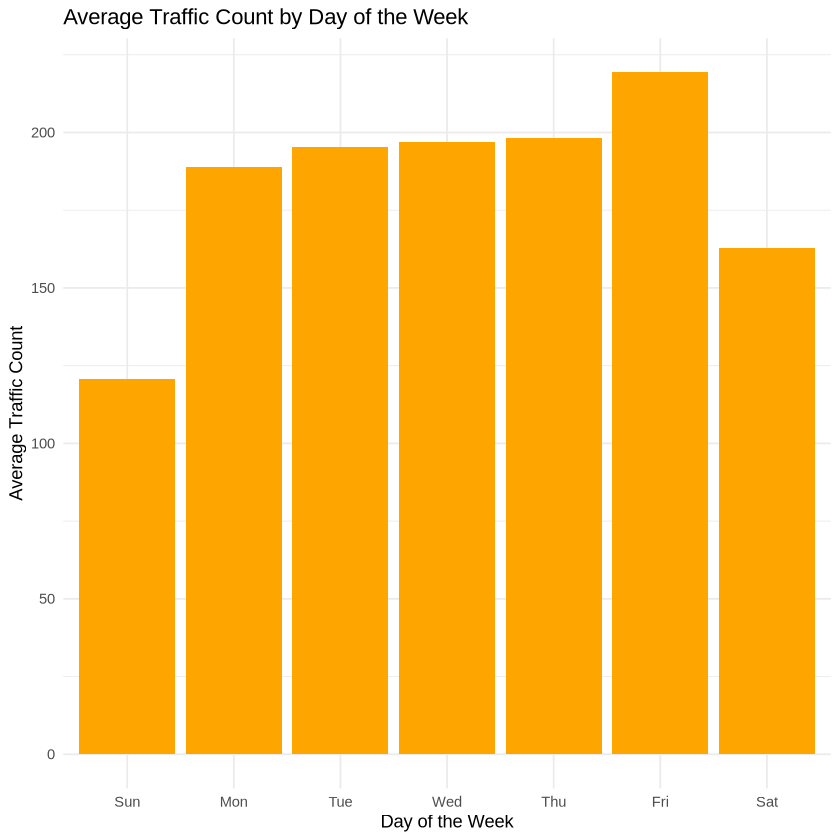

In [21]:
# Load necessary library for date manipulation
library(lubridate)

# Add a new column for the day of the week
data <- data %>%
  mutate(day_of_week = wday(날짜, label = TRUE, abbr = TRUE))

# Group by day_of_week and calculate the average traffic_count
weekly_traffic <- data %>%
  group_by(day_of_week) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))

# Plot the average traffic by day of the week
ggplot(weekly_traffic, aes(x = day_of_week, y = avg_traffic)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Average Traffic Count by Day of the Week",
       x = "Day of the Week",
       y = "Average Traffic Count") +
  theme_minimal()

## Hourly Traffic Pattern by Station

`summarise()` has grouped output by '역명'. You can override using the
`.groups` argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


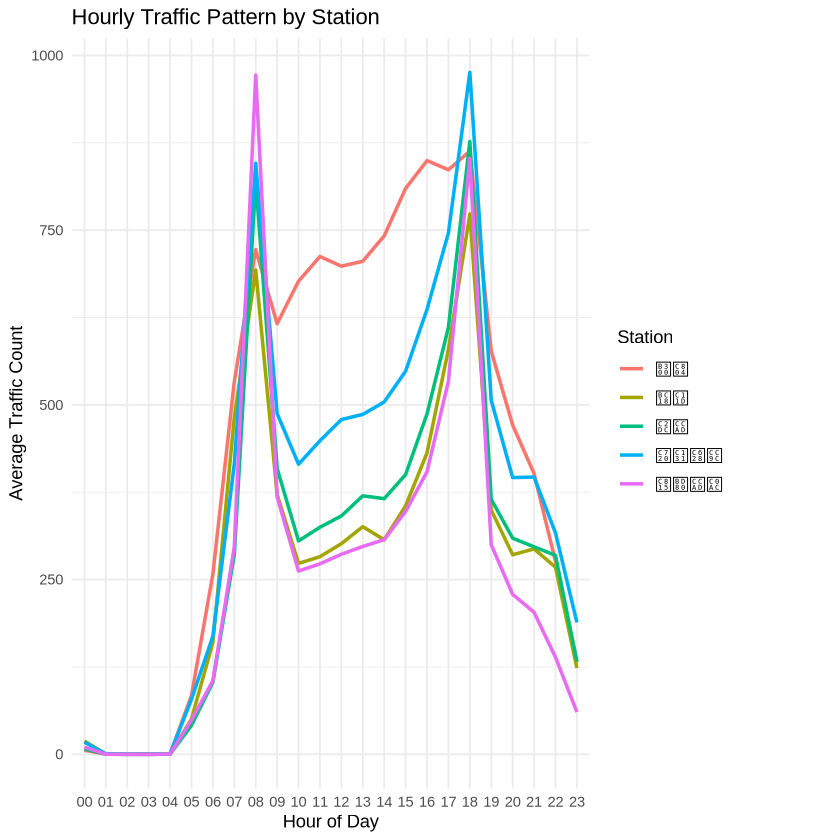

In [22]:
# Select specific stations (top 3 by average traffic count)
selected_stations <- busiest_stations$역명[1:5]

# Filter data for selected stations and group by 역명 and time_period
hourly_station_traffic <- data %>%
  filter(역명 %in% selected_stations) %>%
  group_by(역명, time_period) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))

# Plot the hourly traffic pattern for selected stations
ggplot(hourly_station_traffic, aes(x = time_period, y = avg_traffic, color = 역명, group = 역명)) +
  geom_line(size = 1) +
  labs(title = "Hourly Traffic Pattern by Station",
       x = "Hour of Day",
       y = "Average Traffic Count",
       color = "Station") +
  theme_minimal()

## Monthly Traffic Trend

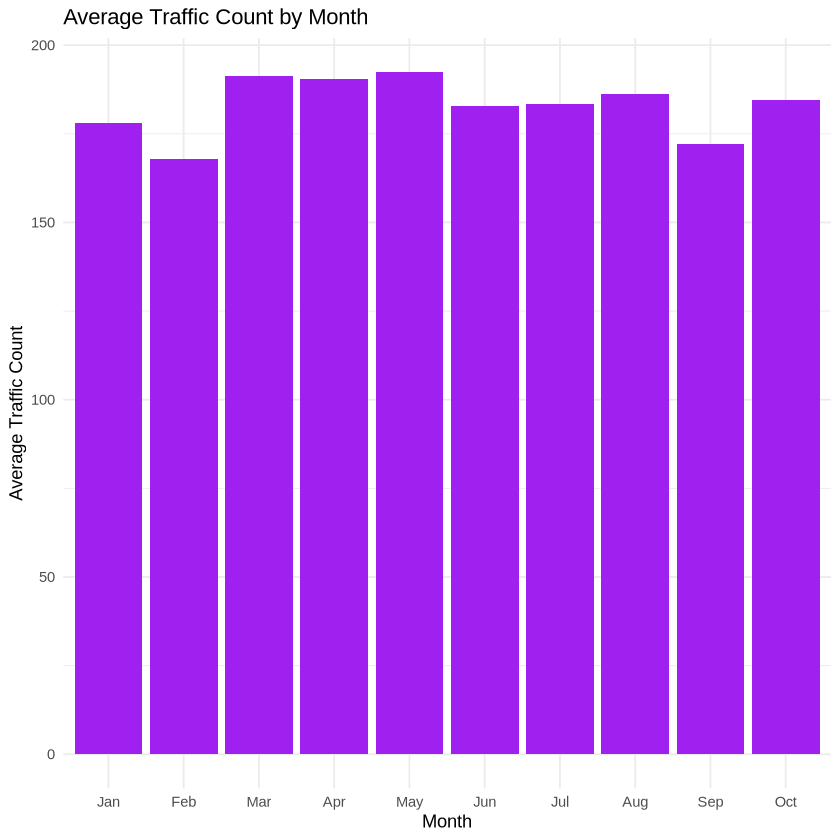

In [23]:
# Extract the month from 날짜 and add as a new column
data <- data %>%
  mutate(month = month(날짜, label = TRUE, abbr = TRUE))

# Group by month and calculate the average traffic count
monthly_traffic <- data %>%
  group_by(month) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))

# Plot the average traffic count by month
ggplot(monthly_traffic, aes(x = month, y = avg_traffic)) +
  geom_bar(stat = "identity", fill = "purple") +
  labs(title = "Average Traffic Count by Month",
       x = "Month",
       y = "Average Traffic Count") +
  theme_minimal()

## Peak boarding vs Alighting

`summarise()` has grouped output by '구분'. You can override using the
`.groups` argument.


구분,time_period,avg_traffic
<chr>,<chr>,<dbl>
승차,00,2.576439e+00
승차,01,3.365838e-02
승차,02,9.436930e-04
승차,03,1.100975e-03
승차,04,5.759673e-01
승차,05,4.979868e+01
승차,06,9.639163e+01
승차,07,2.553553e+02
승차,08,4.393863e+02


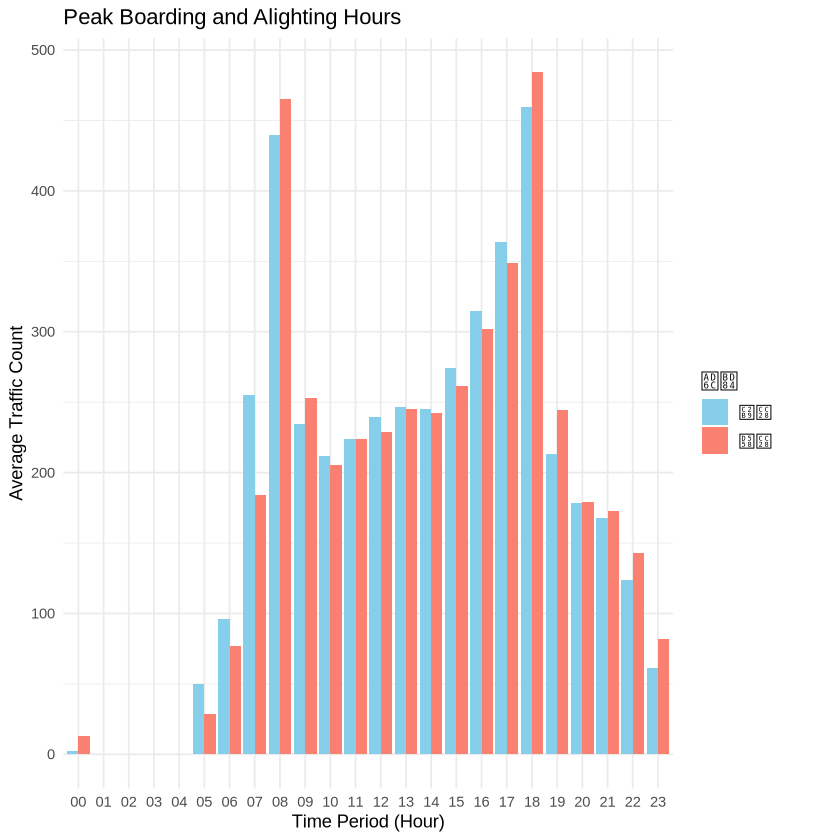

In [26]:
# Group by 구분 and time_period to calculate average traffic_count
peak_hours <- data %>%
  group_by(구분, time_period) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))
peak_hours


# Plot boarding and alighting traffic count by time period
ggplot(peak_hours, aes(x = time_period, y = avg_traffic, fill = 구분)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Peak Boarding and Alighting Hours",
       x = "Time Period (Hour)",
       y = "Average Traffic Count") +
  theme_minimal() +
  scale_fill_manual(values = c("승차" = "skyblue", "하차" = "salmon"))

## Traffic Pattern on Weekdays vs Weekends

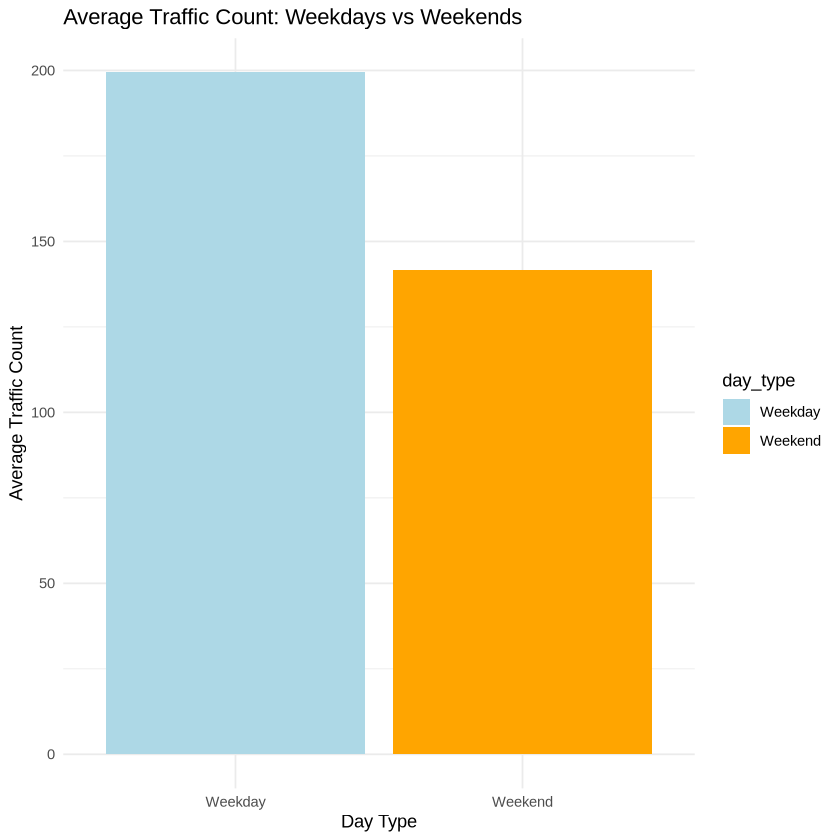

In [25]:
# Add a new column for weekday vs weekend
data <- data %>%
  mutate(day_type = ifelse(wday(날짜) %in% c(1, 7), "Weekend", "Weekday"))

# Group by day_type and calculate the average traffic count
day_type_traffic <- data %>%
  group_by(day_type) %>%
  summarise(avg_traffic = mean(traffic_count, na.rm = TRUE))

# Plot the average traffic for weekdays vs weekends
ggplot(day_type_traffic, aes(x = day_type, y = avg_traffic, fill = day_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Traffic Count: Weekdays vs Weekends",
       x = "Day Type",
       y = "Average Traffic Count") +
  theme_minimal() +
  scale_fill_manual(values = c("Weekday" = "lightblue", "Weekend" = "orange"))
